# 02 Exploratory Data Analysis (EDA)
This notebook explores return behavior through visualizations and summary statistics.

Basic statistics and relationship between review scores and return status

In [ ]:
from pathlib import Path
import pandas as pd

ROOT = Path.cwd().parent
RAW_DIR = ROOT / "data" / "raw" / "olist"
PROCESSED_DIR = ROOT / "data" / "processed"

df = pd.read_parquet(PROCESSED_DIR / "df.parquet")
print(df.shape)
df.head()

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check Basic stats
print(df.describe())

# Check for missing values
print("\Missing values in each column: \n", df. isnull().sum ())

# Counts by review score
print("\nData counts by review score:\n", df['review_score'].value_counts ())

# Counts by return status
print("\nData count by return status:\n", df['return_status'].value_counts()) # 1(returned), O (not returned)

# Return rate by review score
review_return_rate = df.groupby('review_score')['return_status'].mean() # Group data by review score to calculate average return rate
print(review_return_rate)

        review_score  return_status
count  112372.000000  112372.000000
mean        4.032473       0.004708
std         1.387849       0.068450
min         1.000000       0.000000
25%         4.000000       0.000000
50%         5.000000       0.000000
75%         5.000000       0.000000
max         5.000000       1.000000
\Missing values in each column: 
 order_id                    0
customer_id                 0
order_status                0
review_score                0
return_status               0
product_id                  0
product_category_name    1598
dtype: int64

Data counts by review score:
 review_score
5    63525
4    21315
1    14235
3     9423
2     3874
Name: count, dtype: int64

Data count by return status:
 return_status
0    111843
1       529
Name: count, dtype: int64
review_score
1    0.028381
2    0.009035
3    0.003608
4    0.000610
5    0.000677
Name: return_status, dtype: float64


#### Explanation<br>
Return data exists, so we can analyze the relationship between review scores and return rates.

### Data Visualization

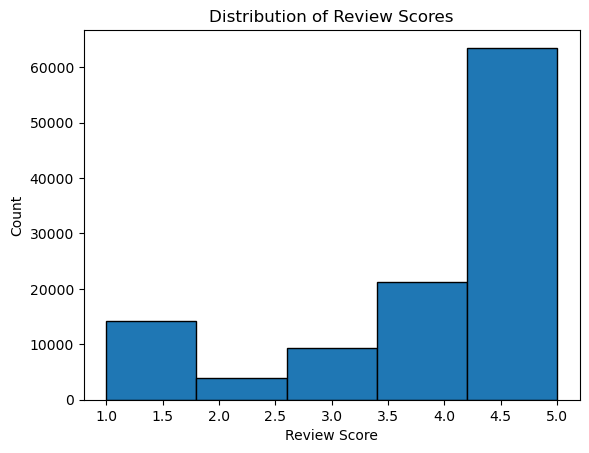

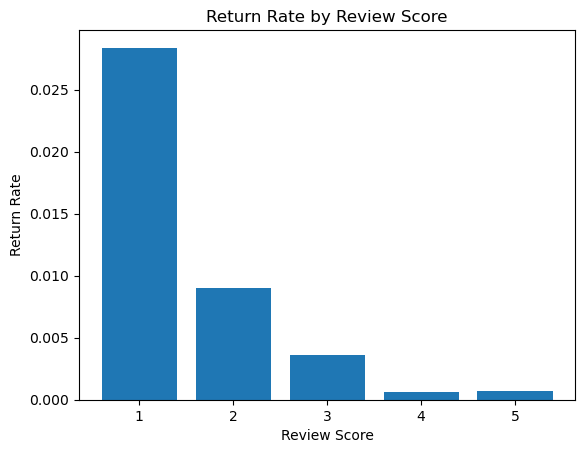

In [6]:
# Histogram of review scores
plt.hist(df['review_score'], bins=5, edgecolor='black')
plt.xlabel ("Review Score")
plt.ylabel ("Count")
plt.title("Distribution of Review Scores")
plt.show()

# Bar chart: return rate by review score
plt.bar(review_return_rate.index, review_return_rate.values)
plt.xlabel('Review Score')
plt.ylabel('Return Rate')
plt.title('Return Rate by Review Score')
plt.show()

               review_score  return_status
review_score       1.000000      -0.120858
return_status     -0.120858       1.000000


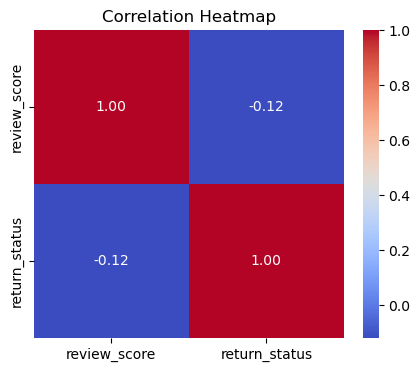

In [7]:
# Correlation between review score and return status
correlation = df[['review_score', 'return_status']].corr()
print(correlation)
# correlation = -0.12, weak negative relationship

# Heatmap of correlation
plt.figure(figsize=(5, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
# Red (1.00): Strong Positive Relationship (itself)
# Blue (-0.12): Weak Negative Relationship

#### Explanation<br>  
**Correlation coefficient**<br>  
- correlation = -0.12: Weak negative correlation  
- Lower review scores are slightly associated with a higher return rate, but the relationship is not strong.  

**Heatmap analysis**<br>  
- The correlation between review_score and return_status is -0.12 (blue), meaning a slightly increased return rate with lower scores. However, the relationship is not strong, so - there may be more influential factors.  

**Additional Analysis Required**<br>  
- Relationship between price and return rate
- Delivery time and return status
- Return rate by product category